# Imports

In [1]:
!pip install antropy

In [52]:
import pandas as pd
import numpy as np
import antropy as ant
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, DistanceMetric
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph
import os

# Carga datos

In [3]:
# s_05_03 = pd.read_csv('dataset/data/sub_05/rec_3.csv')
s_05_03 = pd.read_csv('rec_3.csv')
s_05_03.head()

,pelvis_x,pelvis_y,pelvis_z,L5_x,L5_y,L5_z,L3_x,L3_y,L3_z,T12_x,...,lowerLegLeft_z,footLeft_x,footLeft_y,footLeft_z,toeLeft_x,toeLeft_y,toeLeft_z,vel_x,vel_y,vel_z
0,10.825740,1.687339,0.901162,10.821957,1.688543,0.998533,10.801117,1.684932,1.103688,10.789364,...,0.489737,10.847054,1.590837,0.086303,10.690569,1.543336,0.040219,0.101791,0.048034,0.061909
1,10.826746,1.687909,0.901579,10.822491,1.689396,0.998923,10.801186,1.686003,1.103991,10.789015,...,0.490681,10.847797,1.591756,0.087400,10.691583,1.544044,0.040627,0.106294,0.052266,0.062296
2,10.827751,1.688479,0.901995,10.823026,1.690249,0.999314,10.801255,1.687074,1.104293,10.788665,...,0.491625,10.848540,1.592674,0.088496,10.692597,1.544752,0.041036,0.110797,0.056498,0.062684
3,10.828800,1.688855,0.902391,10.823661,1.690839,0.999687,10.801457,1.687831,1.104582,10.788469,...,0.492438,10.849213,1.593081,0.089413,10.693475,1.544821,0.041617,0.107863,0.051933,0.059625
4,10.829987,1.688930,0.902780,10.824518,1.691051,1.000055,10.801913,1.688148,1.104867,10.788529,...,0.493119,10.849844,1.592494,0.090127,10.694226,1.543555,0.042641,0.090787,0.030129,0.052072


# Corelación entre datos

## Visualizar correlaciones

In [ ]:
corrs = s_05_03[s_05_03.columns[:18]].corr()
datos = s_05_03.iloc[:, :18]
sns.heatmap(corrs)
sns.pairplot(s_05_03[s_05_03.columns[:18]])

## Restar la posición de la pelvis

In [4]:
resta = s_05_03.copy()
for i in range(3):
  resta.iloc[:,3+i:3]-= s_05_03.iloc[:,i:i+1].to_numpy()
resta.shape

(4089, 72)

# Normalización
Normalización de los puntos

#Dimensionality Reduction (PCA)

In [5]:
stnd_scaler = preprocessing.StandardScaler()
df_stnd = stnd_scaler.fit_transform(resta)

min_max_scaler = preprocessing.MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(resta)
df_normalizado = df_stnd
type(df_minmax)

numpy.ndarray

In [6]:
pca_minmax = PCA ()
pca_stnd = PCA ()

X_pca_minmax = pca_minmax.fit_transform(df_minmax)
X_pca_stnd = pca_stnd.fit_transform(df_stnd)
print(f'Minmax -> {pca_minmax.explained_variance_ratio_}')
print(f'Standard -> {pca_stnd.explained_variance_ratio_}')

Minmax -> [6.26111190e-01 1.69414100e-01 1.08745754e-01 2.95396608e-02
 1.63425129e-02 1.55214532e-02 1.33828788e-02 1.03011483e-02
 3.67888430e-03 3.42084412e-03 1.35167632e-03 7.83835994e-04
 4.84749641e-04 2.91562664e-04 2.33964066e-04 1.08582395e-04
 9.06521252e-05 7.50565273e-05 4.50112302e-05 3.45949563e-05
 2.02482267e-05 4.06969080e-06 3.76619712e-06 2.72921887e-06
 2.41686255e-06 1.78896001e-06 1.54407407e-06 1.48211260e-06
 8.90755244e-07 7.70381657e-07 7.42318807e-07 5.92504096e-07
 2.11406188e-07 1.22699003e-07 9.63373585e-08 9.02439197e-08
 6.83429126e-08 5.67646117e-08 4.70059990e-08 3.84686511e-08
 2.79524801e-08 2.29024122e-08 1.68078878e-08 1.34524755e-08
 1.11789995e-08 9.46261327e-09 3.94551222e-09 2.21496756e-09
 1.67539344e-09 1.18700577e-09 1.07068912e-09 7.30544453e-10
 5.94869253e-10 4.76303930e-10 3.66032798e-10 3.40565840e-10
 2.65472317e-10 1.12619276e-10 8.85762505e-11 1.00033841e-11
 5.38861393e-12 3.66740150e-12 2.84551904e-12 2.24495900e-12
 1.34194436e-1

In [7]:
exp_var_cumul_stnd = np.cumsum(pca_stnd.explained_variance_ratio_)
exp_var_cumul_minmax = np.cumsum(pca_minmax.explained_variance_ratio_)

trace1 =  go.Scatter(x=list(range(1, 12)), y=exp_var_cumul_minmax, name = "MinMax Scaler")
trace2 = go.Scatter(x=list(range(1, 12)), y=exp_var_cumul_stnd, name = "Standard Scaler")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=False)
fig['layout'].update(height = 600, width = 800, title = "MinMax Scaler vs. Standard Scaler", xaxis=dict(
      tickangle=0
    ))
fig.update_layout(xaxis_title="# Components",
    yaxis_title="Explained Variance")
fig.show()

Se puede ver que con 3 elementos se explica el 90% con **MinMax** mientras que con **Standard** solo el 87%.
Por ende eligiré **MinMax**.

In [8]:
pca = pca_minmax
X_pca = X_pca_minmax
exp_var_cumul = exp_var_cumul_minmax

## Visualización

In [12]:
pca_coeffs = pd.DataFrame(np.matrix.transpose(pca.components_[:3]),
                      columns=['PC-1', 'PC-2', 'PC-3'], index=s_05_03.columns)
pca_coeffs

,PC-1,PC-2,PC-3
pelvis_x,-0.137014,0.018384,0.155186
pelvis_y,0.156846,0.029599,0.133090
pelvis_z,-0.014517,0.256206,-0.040643
L5_x,-0.137106,0.018379,0.155165
L5_y,0.156887,0.029614,0.133148
...,...,...,...
toeLeft_y,0.154978,0.029236,0.131751
toeLeft_z,-0.000247,0.000896,-0.006322
vel_x,0.007435,0.007111,0.099908
vel_y,0.003347,-0.008857,-0.052284


### Visualización 2D

In [14]:
fig = px.scatter(
    X_pca, x=0, y=1,

    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()

### Visualización 3D

In [13]:
fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2,

    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()

##Resultados

In [16]:
n_components = 3
estimator = PCA(n_components = n_components)
X_pca = estimator.fit_transform(df_minmax)

pca_results = pd.DataFrame(np.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2', 'PC-3'], index=s_05_03.columns)

# Ventaneo
Dividir los datos en fragmentos de 4 segundos

In [9]:
freq =60
segundos =4
ventana = freq*segundos
def ventaneo(df_normalizado):
  ventanal = []
  for i in range (0, len(df_normalizado)- ventana+1, ventana):
    ventanal.append(df_normalizado[i:i+ventana])
  ventanal = np.array(ventanal)
  ventanal.shape
  return ventanal

# Extracción de características

## Media

In [10]:
def medias (ventanal):
  medias = ventanal.mean(axis=1)
  medias.shape
  return medias

## Desviación típica

In [11]:
def desviaciones (ventanal):
  desviaciones = ventanal.std(axis=1)
  desviaciones.shape
  return desviaciones

## Mínimo y máximo

### Mínimo

In [12]:
def minimos (ventanal):
  minimos = ventanal.min(axis = 1)
  minimos.shape
  return minimos

### Máximo

In [13]:
def maximos (ventanal):
  maximos = ventanal.max(axis = 1)
  maximos.shape
  return maximos

## Energía de la señal

In [20]:
def energia (ventanal):
  ventanalcuadrado = ventanal ** 2
  energia = ventanalcuadrado.sum(axis = 1)
  energia.shape
  return energia

## Parámetros de Hjorth

In [15]:
def hjorth_params(ventanal):
  mobility, complexity = ant.hjorth_params(ventanal, 1)
  activity = ventanal.var(axis =1)
  activity.shape
  mobility.shape
  complexity.shape
  return activity, mobility, complexity

##Ejecutar todas las funciones

In [16]:
def ejecucion(ventanal):
  valor_medias = medias(ventanal)
  valor_desviaciones = desviaciones(ventanal)
  valor_minimos = minimos(ventanal)
  valor_maximos = maximos(ventanal)
  valor_energia = energia(ventanal)
  valor_activity, valor_mobility, valor_complexity = hjorth_params(ventanal)
  return valor_medias, valor_desviaciones, valor_minimos, valor_maximos, valor_energia, valor_activity, valor_mobility, valor_complexity

# Juntar las características

In [17]:
nombres_base = s_05_03.columns
nombres_media = [s + "_med" for s in nombres_base]
nombres_desviacion = [s + "_desv" for s in nombres_base]
nombres_minimo = [s + "_min" for s in nombres_base]
nombres_maximo =  [s + "_max" for s in nombres_base]
nombres_energia = [s + "_ener" for s in nombres_base]
nombres_actividad = [s + "_act" for s in nombres_base]
nombres_movilidad = [s + "_mov" for s in nombres_base]
nombres_complejidad = [s + "_comp" for s in nombres_base]
cols = [
    *nombres_media,
    *nombres_desviacion,
    *nombres_minimo,
    *nombres_maximo,
    *nombres_energia,
    *nombres_actividad,
    *nombres_movilidad,
    *nombres_complejidad,
]
def juntar_caracteristicas(medias, desviaciones, minimos, maximos, energia, activity, mobility, complexity):
  medias_reshaped = medias.reshape(-1, medias.shape[-1])
  desviaciones_reshaped = desviaciones.reshape(-1, desviaciones.shape[-1])
  minimos_reshaped = minimos.reshape(-1, minimos.shape[-1])
  maximos_reshaped = maximos.reshape(-1, maximos.shape[-1])
  energia_reshaped = energia.reshape(-1, energia.shape[-1])
  activity_reshaped = activity.reshape(-1, activity.shape[-1])
  mobility_reshaped = mobility.reshape(-1, mobility.shape[-1])
  complexity_reshaped = complexity.reshape(-1, complexity.shape[-1])
  arrays = [medias_reshaped, desviaciones_reshaped, minimos_reshaped, maximos_reshaped,
            energia_reshaped, activity_reshaped, mobility_reshaped, complexity_reshaped]
  stacked_array = np.concatenate(arrays, axis=1)
  df = pd.DataFrame(stacked_array, columns=cols)
  return df

#Ejecución desde Normalización

In [21]:
ventanal_minmax = ventaneo(df_minmax)
medias_minmax, desviaciones_minmax, minimos_minmax, maximos_minmax, energia_minmax, activity_minmax, mobility_minmax, complexity_minmax = ejecucion(ventanal_minmax)
df_minmax_procesado = juntar_caracteristicas(medias_minmax, desviaciones_minmax, minimos_minmax, maximos_minmax, energia_minmax, activity_minmax, mobility_minmax, complexity_minmax)

#  Elección de algoritmo

##KMeans

In [22]:
# evaluación Silhouette para KMeans
def dibujar_silhouette(df, nombre):
  silhouette_scores = []
  distortions = []
  for n_clusters in range(2, 11):
      kmeans = KMeans(n_clusters=n_clusters, n_init = 10, random_state=42)
      cluster_labels = kmeans.fit_predict(df)
      silhouette_avg = silhouette_score(df, cluster_labels)
      silhouette_scores.append(silhouette_avg)
      distortions.append(kmeans.inertia_)
  x = [i for i in range(2,11)]
  fig, ax1 = plt.subplots()

  color = 'tab:red'
  ax1.set_xlabel('k')
  ax1.set_ylabel('sse', color=color)
  ax1.plot(x, distortions, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('silhouette', color=color)
  ax2.plot(x, silhouette_scores, color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()
  plt.show()


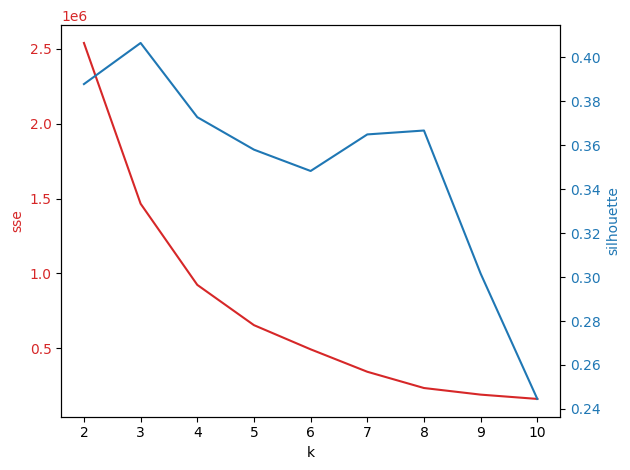

In [25]:
dibujar_silhouette(df_minmax_procesado, "minmax")

In [26]:
k = 7
print ("Number of clusters", k)
km = KMeans(n_clusters = k, n_init = 10 , random_state = 42)

y_km = km.fit_predict(X_pca)

Number of clusters 7


In [29]:
print("Silhouette Coefficient: %0.3f"% silhouette_score(X_pca, y_km))
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.279
Distortion: 5186.00


In [36]:
s_05_03['cluster_kmeans'] = km.labels_

print(len(km.labels_))
print(km.labels_)

4089
[1 1 1 ... 5 5 5]


In [30]:
colors = km.labels_

fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2,
    color = colors,
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()

###Interpetación

In [38]:
kmeans_stats = s_05_03.groupby('cluster_kmeans').agg(['mean', 'median', 'std'])
kmeans_stats

pelvis_x                       pelvis_y                       \
                    mean    median       std       mean     median       std   
cluster_kmeans                                                                 
0              -6.680747 -6.800721  1.184645   8.927289   8.937685  2.303177   
1               8.698926  9.108624  2.234845   1.904517   1.681632  0.744735   
2              -0.243082 -0.213017  2.427051   2.332853   2.205741  1.441667   
3              -6.688023 -6.881786  1.445530  15.034052  15.103306  2.895988   
4              -3.846615 -4.091277  2.222590   4.934095   4.862025  2.265288   
5               6.105611  6.001827  3.118584   1.712639   1.750522  0.827919   
6              -5.910516 -5.792286  1.490924  17.097204  17.310063  1.975703   

                pelvis_z                          L5_x  ...     vel_x  \
                    mean    median       std      mean  ...       std   
cluster_kmeans                                          ...             
0               0.894157  0.895931  0.006809 -6.680026  ...  0.429344   
1               0.897404  0.898208  0.006204  8.698021  ...  0.828156   
2               0.895138  0.896452  0.006290 -0.241606  ...  0.854879   
3               0.871128  0.870616  0.005695 -6.688281  ...  0.550907   
4               0.871095  0.870420  0.006290 -3.845847  ...  0.830010   
5               0.872746  0.872240  0.006271  6.105748  ...  1.112761   
6               0.893639  0.894860  0.006193 -5.911930  ...  0.487541   

                   vel_y                         vel_z                      \
                    mean    median       std      mean    median       std   
cluster_kmeans                                                               
0               0.073350  0.739249  0.891659  0.009725  0.001836  0.120817   
1               0.044767 -0.008118  0.180688  0.002980 -0.002176  0.102680   
2              -0.008205 -0.113215  0.434165  0.005959  0.001075  0.115414   
3               0.009049  0.257549  1.020987 -0.012914  0.005975  0.120209   
4               0.118208  0.537270  0.839608 -0.008561  0.019945  0.128195   
5              -0.006581  0.027083  0.300817 -0.008433  0.017264  0.122148   
6              -0.027554 -0.087189  0.746976  0.008937  0.003430  0.109430   

               cluster_id_kmeans              
                            mean median  std  
cluster_kmeans                                
0                            0.0    0.0  0.0  
1                            1.0    1.0  0.0  
2                            2.0    2.0  0.0  
3                            3.0    3.0  0.0  
4                            4.0    4.0  0.0  
5                            5.0    5.0  0.0  
6                            6.0    6.0  0.0  

[7 rows x 219 columns]

##DBScan

###Parámetros

In [41]:
dist = DistanceMetric.get_metric('euclidean')
matdist = dist.pairwise(df_minmax)

In [53]:
minPts=3
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])

seq.sort()

In [54]:
fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

In [46]:
results = []
for eps in np.arange(0.18, 0.45, 0.01):
  db = DBSCAN(eps, min_samples=3).fit(df_minmax)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  #print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  results.append([eps, n_clusters_, n_outliers])

#print results
from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
 0.18         230        2265
 0.19         239        2014
 0.2          249        1776
 0.21         246        1551
 0.22         234        1345
 0.23         218        1144
 0.24         207         944
 0.25         194         736
 0.26         175         548
 0.27         151         387
 0.28         118         259
 0.29          90         155
 0.3           59          93
 0.31          35          60
 0.32          15          33
 0.33           5          18
 0.34           1           6
 0.35           1           1
 0.36           1           1
 0.37           1           0
 0.38           1           0
 0.39           1           0
 0.4            1           0
 0.41           1           0
 0.42           1           0
 0.43           1           0
 0.44           1           0


###Ejecución

In [68]:
db = DBSCAN(eps=0.24, min_samples=3).fit(df_minmax)
labels = db.labels_
s_05_03['dbscan_group'] = labels
s_05_03[s_05_03['dbscan_group'] == -1]

,pelvis_x,pelvis_y,pelvis_z,L5_x,L5_y,L5_z,L3_x,L3_y,L3_z,T12_x,...,footLeft_z,toeLeft_x,toeLeft_y,toeLeft_z,vel_x,vel_y,vel_z,cluster_id_kmeans,cluster_kmeans,dbscan_group
120,10.623328,1.628563,0.873835,10.621105,1.630517,0.971241,10.600544,1.628100,1.076486,10.588461,...,0.086534,10.693970,1.544947,0.041172,-0.799974,0.050461,-0.131938,5,5,-1
121,10.609839,1.629270,0.870287,10.607501,1.631040,0.967694,10.586872,1.628562,1.072924,10.574729,...,0.086597,10.693689,1.544162,0.039753,-0.839968,0.068774,-0.124003,5,5,-1
122,10.595746,1.630203,0.866583,10.593291,1.631751,0.963992,10.572620,1.629189,1.069212,10.560451,...,0.086925,10.693374,1.543182,0.038163,-0.881509,0.089557,-0.112154,5,5,-1
129,10.487880,1.639961,0.867103,10.485058,1.639823,0.964514,10.465086,1.637006,1.069862,10.453975,...,0.132883,10.700581,1.543549,0.016766,-1.011331,0.061906,0.150765,5,5,-1
130,10.470931,1.640893,0.870380,10.468195,1.640748,0.967793,10.448635,1.638030,1.073220,10.438038,...,0.146947,10.700901,1.543333,0.019985,-0.988605,0.052653,0.160643,5,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,11.847304,3.356245,0.886917,11.841279,3.356616,0.984181,11.848249,3.358719,1.091195,11.845969,...,0.223311,11.539592,3.432463,0.058944,0.975074,0.151849,0.229785,1,1,-1
4054,11.863627,3.359093,0.890556,11.857562,3.359454,0.987818,11.864517,3.361603,1.094833,11.862267,...,0.230405,11.569152,3.443817,0.065263,0.947040,0.185707,0.231552,1,1,-1
4055,11.879042,3.362141,0.894174,11.873037,3.362381,0.991440,11.880026,3.364517,1.098452,11.877825,...,0.234647,11.604915,3.456717,0.070147,0.926869,0.222111,0.215566,1,1,-1
4056,11.894176,3.365479,0.897510,11.888219,3.365591,0.994779,11.895239,3.367720,1.101789,11.893089,...,0.235818,11.643758,3.469341,0.072965,0.907421,0.250815,0.192546,1,1,-1


In [69]:
colors = [0 if color >= 0 else -1 for color in s_05_03['dbscan_group']]

In [70]:
fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2,
    color = colors,
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()

# Interpretación de resultados

##Resumen

## Visualización